In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/content/Uterine Corpus Endometrial Carcinoma.csv")
# Display basic information about the dataset
print("Original Dataset Info:")
print(df.info())

df.head()

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID                        529 non-null    object 
 1   Sample ID                         529 non-null    object 
 2   Cancer Type Detailed              529 non-null    object 
 3   Overall Survival Status           529 non-null    object 
 4   Disease Free Status               414 non-null    object 
 5   Disease-specific Survival status  527 non-null    object 
 6   Mutation Count                    515 non-null    float64
 7   Fraction Genome Altered           519 non-null    float64
 8   Diagnosis Age                     526 non-null    float64
 9   MSI MANTIS Score                  526 non-null    float64
 10  MSIsensor Score                   528 non-null    float64
 11  Race Category                     497 non-null  

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,TCGA-5B-A90C,TCGA-5B-A90C-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma


In [3]:
columns_to_drop_na = ['Disease Free Status', 'MSIsensor Score']
df = df.dropna(subset=columns_to_drop_na)


In [4]:
# Display information after cleaning
print("\nCleaned Dataset Info:")
print(df.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 1 to 528
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID                        413 non-null    object 
 1   Sample ID                         413 non-null    object 
 2   Cancer Type Detailed              413 non-null    object 
 3   Overall Survival Status           413 non-null    object 
 4   Disease Free Status               413 non-null    object 
 5   Disease-specific Survival status  413 non-null    object 
 6   Mutation Count                    402 non-null    float64
 7   Fraction Genome Altered           405 non-null    float64
 8   Diagnosis Age                     411 non-null    float64
 9   MSI MANTIS Score                  411 non-null    float64
 10  MSIsensor Score                   413 non-null    float64
 11  Race Category                     386 non-null  

In [5]:
# Display the number of null values in each column
null_counts = df.isnull().sum()
print("Null Values in Each Column:")
print(null_counts)

# Display the total number of null values in the entire DataFrame
total_nulls = df.isnull().sum().sum()
print("\nTotal Null Values in the DataFrame:", total_nulls)

Null Values in Each Column:
Patient ID                           0
Sample ID                            0
Cancer Type Detailed                 0
Overall Survival Status              0
Disease Free Status                  0
Disease-specific Survival status     0
Mutation Count                      11
Fraction Genome Altered              8
Diagnosis Age                        2
MSI MANTIS Score                     2
MSIsensor Score                      0
Race Category                       27
Subtype                             18
Tumor Type                           0
dtype: int64

Total Null Values in the DataFrame: 68


In [6]:
df['Mutation Count'].fillna(df['Mutation Count'].mean(), inplace=True)
df['Fraction Genome Altered'].fillna(df['Fraction Genome Altered'].mean(), inplace=True)
df['Diagnosis Age'].fillna(df['Diagnosis Age'].median(), inplace=True)
df['MSI MANTIS Score'].fillna(df['MSI MANTIS Score'].mean(), inplace=True)


In [7]:
df['Race Category'].fillna('Unknown', inplace=True)
df['Subtype'].fillna('Unknown', inplace=True)


In [8]:
# Display the number of null values in each column after cleaning
cleaned_null_counts = df.isnull().sum()
print("Null Values in Each Column After Cleaning:")
print(cleaned_null_counts)

# Display the total number of null values in the entire DataFrame after cleaning
total_cleaned_nulls = df.isnull().sum().sum()
print("\nTotal Null Values in the DataFrame After Cleaning:", total_cleaned_nulls)


Null Values in Each Column After Cleaning:
Patient ID                          0
Sample ID                           0
Cancer Type Detailed                0
Overall Survival Status             0
Disease Free Status                 0
Disease-specific Survival status    0
Mutation Count                      0
Fraction Genome Altered             0
Diagnosis Age                       0
MSI MANTIS Score                    0
MSIsensor Score                     0
Race Category                       0
Subtype                             0
Tumor Type                          0
dtype: int64

Total Null Values in the DataFrame After Cleaning: 0


In [9]:
df.head()

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.034100,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.058100,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.000100,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma
5,TCGA-A5-A0G2,TCGA-A5-A0G2-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,25696.0,0.372900,57.0,0.4003,8.63,Asian,UCEC_POLE,Serous Endometrial Adenocarcinoma
6,TCGA-A5-A0G3,TCGA-A5-A0G3-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:LIVING,1:Recurred/Progressed,0:ALIVE OR DEAD TUMOR FREE,38.0,0.163094,61.0,0.2720,1.18,Black or African American,Unknown,Serous Endometrial Adenocarcinoma


Summary Statistics:
       Mutation Count  Fraction Genome Altered  Diagnosis Age  \
count      413.000000               413.000000     413.000000   
mean      1097.430348                 0.163094      63.237288   
std       2744.898702                 0.212816      11.050716   
min          7.000000                 0.000000      31.000000   
25%         49.000000                 0.000800      56.000000   
50%         91.000000                 0.049900      63.000000   
75%        630.000000                 0.243200      71.000000   
max      25696.000000                 0.947200      90.000000   

       MSI MANTIS Score  MSIsensor Score  
count        413.000000       413.000000  
mean           0.440447         6.603874  
std            0.241987        10.364375  
min            0.237000         0.000000  
25%            0.282100         0.090000  
50%            0.308600         0.430000  
75%            0.546700        12.220000  
max            1.304900        40.430000  


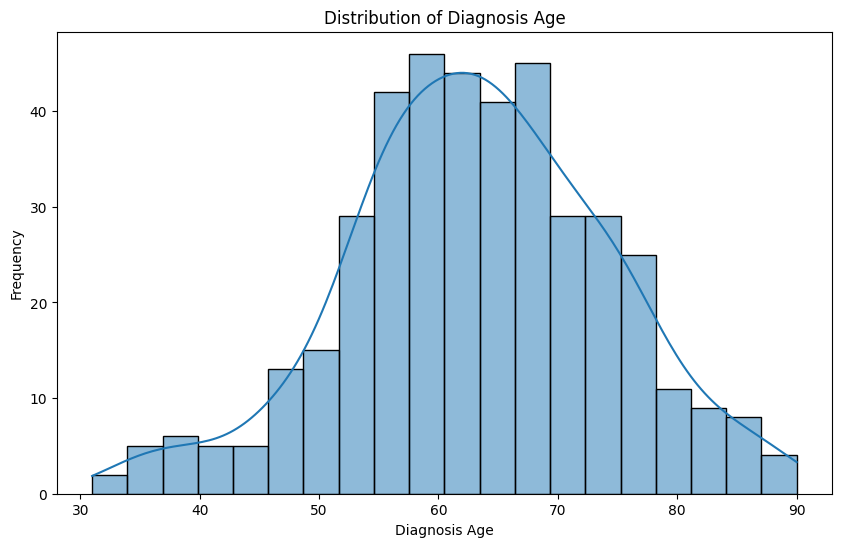

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Visualize the distribution of 'Diagnosis Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Diagnosis Age'], bins=20, kde=True)
plt.title('Distribution of Diagnosis Age')
plt.xlabel('Diagnosis Age')
plt.ylabel('Frequency')
plt.show()


In [11]:
# Create a new feature 'Age Group' based on 'Diagnosis Age'
df['Age Group'] = pd.cut(df['Diagnosis Age'], bins=[0, 40, 60, 80, 100], labels=['0-40', '41-60', '61-80', '81-100'])

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Race Category', 'Subtype'], drop_first=True)
df_encoded


,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,...,Age Group,Race Category_Asian,Race Category_Black or African American,Race Category_Native Hawaiian or Other Pacific Islander,Race Category_Unknown,Race Category_White,Subtype_UCEC_CN_LOW,Subtype_UCEC_MSI,Subtype_UCEC_POLE,Subtype_Unknown
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.034100,54.0,0.3396,...,41-60,0,1,0,0,0,1,0,0,0
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.058100,51.0,0.3199,...,41-60,0,1,0,0,0,1,0,0,0
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.000100,67.0,0.3108,...,61-80,0,0,0,0,1,0,0,1,0
5,TCGA-A5-A0G2,TCGA-A5-A0G2-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,25696.0,0.372900,57.0,0.4003,...,41-60,1,0,0,0,0,0,0,1,0
6,TCGA-A5-A0G3,TCGA-A5-A0G3-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:LIVING,1:Recurred/Progressed,0:ALIVE OR DEAD TUMOR FREE,38.0,0.163094,61.0,0.2720,...,61-80,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,TCGA-QF-A5YT,TCGA-QF-A5YT-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,7.0,0.000100,57.0,0.3502,...,41-60,0,1,0,0,0,1,0,0,0
521,TCGA-QS-A5YQ,TCGA-QS-A5YQ-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,933.0,0.000300,55.0,0.3480,...,41-60,0,1,0,0,0,0,0,1,0
525,TCGA-SJ-A6ZI,TCGA-SJ-A6ZI-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.027500,64.0,0.6138,...,61-80,0,1,0,0,0,0,1,0,0
526,TCGA-SJ-A6ZJ,TCGA-SJ-A6ZJ-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,56.0,0.046600,61.0,0.3382,...,61-80,0,1,0,0,0,1,0,0,0


<ipython-input-12-e955ac0ec552>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
                         Mutation Count  Fraction Genome Altered  \
Mutation Count                 1.000000                -0.202132   
Fraction Genome Altered       -0.202132                 1.000000   
Diagnosis Age                 -0.184214                 0.264059   
MSI MANTIS Score               0.061788                -0.299202   
MSIsensor Score                0.055896                -0.314185   

                         Diagnosis Age  MSI MANTIS Score  MSIsensor Score  
Mutation Count               -0.184214          0.061788         0.055896  
Fraction Genome Altered       0.264059         -0.299202        -0.314185  
Diagnosis Age                 1.000000         -0.040348        -0.023905  
MSI MANTIS Score             -0.040348          1.000000         0.936151  
MSIsensor Score              -0.023905          0.936151         1.000000  


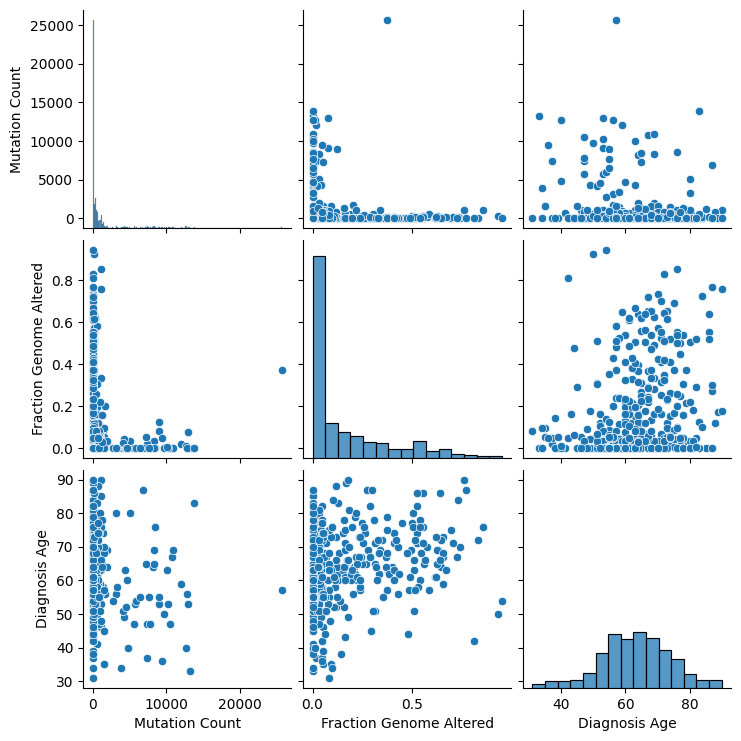

In [12]:
# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Pairplot for selected numerical features
sns.pairplot(df[['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age']])
plt.show()


In [13]:
# Assuming df is your original DataFrame
# Extract information from 'Overall Survival Status'
df['IsLiving'] = df['Overall Survival Status'].apply(lambda x: 1 if 'LIVING' in x else 0)

# Extract information from 'Disease Free Status'
df['IsDiseaseFree'] = df['Disease Free Status'].apply(lambda x: 1 if 'DiseaseFree' in x else 0)
df['IsAliveOrDeadTumorFree'] = df['Disease Free Status'].apply(lambda x: 1 if 'ALIVE OR DEAD TUMOR FREE' in x else 0)


In [14]:
df

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type,Age Group,IsLiving,IsDiseaseFree,IsAliveOrDeadTumorFree
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.034100,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma,41-60,1,1,0
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.058100,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma,41-60,1,1,0
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.000100,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma,61-80,0,1,0
5,TCGA-A5-A0G2,TCGA-A5-A0G2-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,25696.0,0.372900,57.0,0.4003,8.63,Asian,UCEC_POLE,Serous Endometrial Adenocarcinoma,41-60,1,1,0
6,TCGA-A5-A0G3,TCGA-A5-A0G3-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,0:LIVING,1:Recurred/Progressed,0:ALIVE OR DEAD TUMOR FREE,38.0,0.163094,61.0,0.2720,1.18,Black or African American,Unknown,Serous Endometrial Adenocarcinoma,61-80,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,TCGA-QF-A5YT,TCGA-QF-A5YT-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,7.0,0.000100,57.0,0.3502,0.00,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma,41-60,1,1,0
521,TCGA-QS-A5YQ,TCGA-QS-A5YQ-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,933.0,0.000300,55.0,0.3480,0.00,Black or African American,UCEC_POLE,Endometrioid Endometrial Adenocarcinoma,41-60,1,1,0
525,TCGA-SJ-A6ZI,TCGA-SJ-A6ZI-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,1306.0,0.027500,64.0,0.6138,14.35,Black or African American,UCEC_MSI,Endometrioid Endometrial Adenocarcinoma,61-80,1,1,0
526,TCGA-SJ-A6ZJ,TCGA-SJ-A6ZJ-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,56.0,0.046600,61.0,0.3382,0.00,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma,61-80,1,1,0


<ipython-input-15-dac028cc62f8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


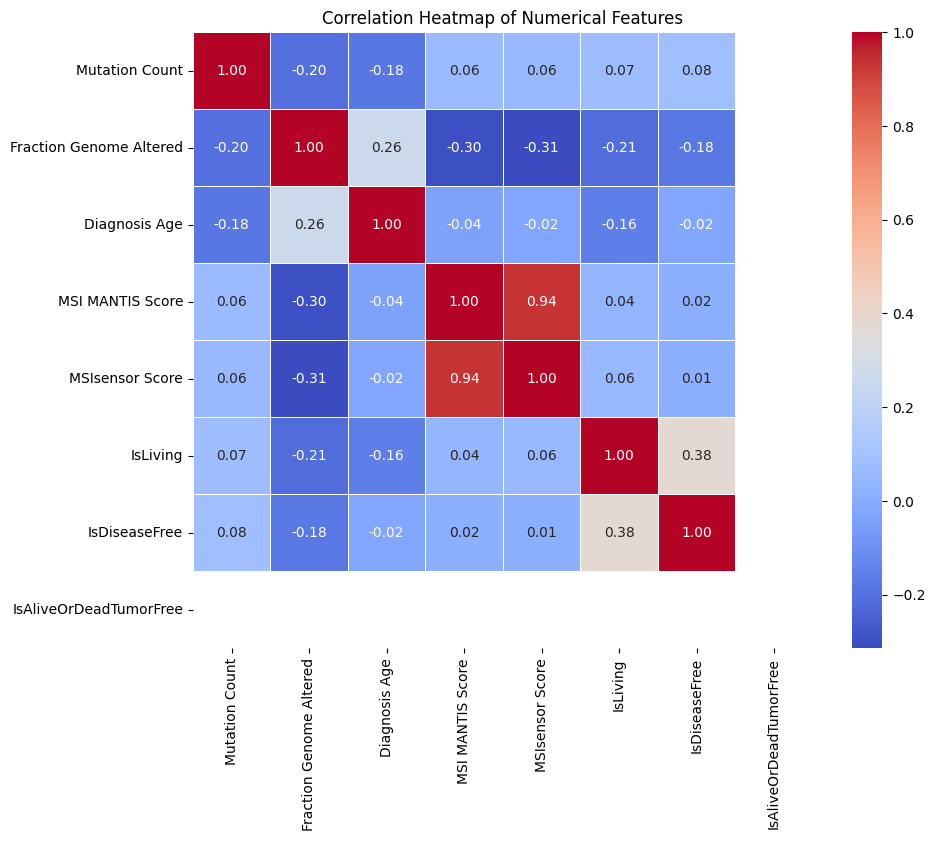

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-16-74e3e6cd58e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease-specific Survival status', data=df, palette='viridis')  # Change 'viridis' to your desired color palette


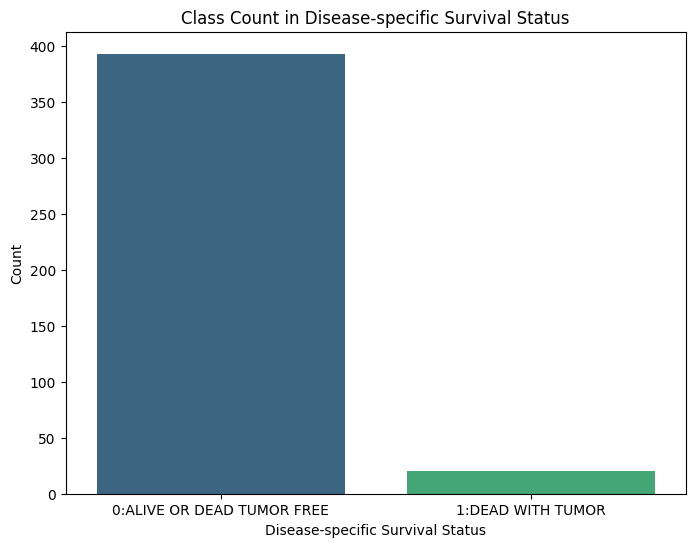

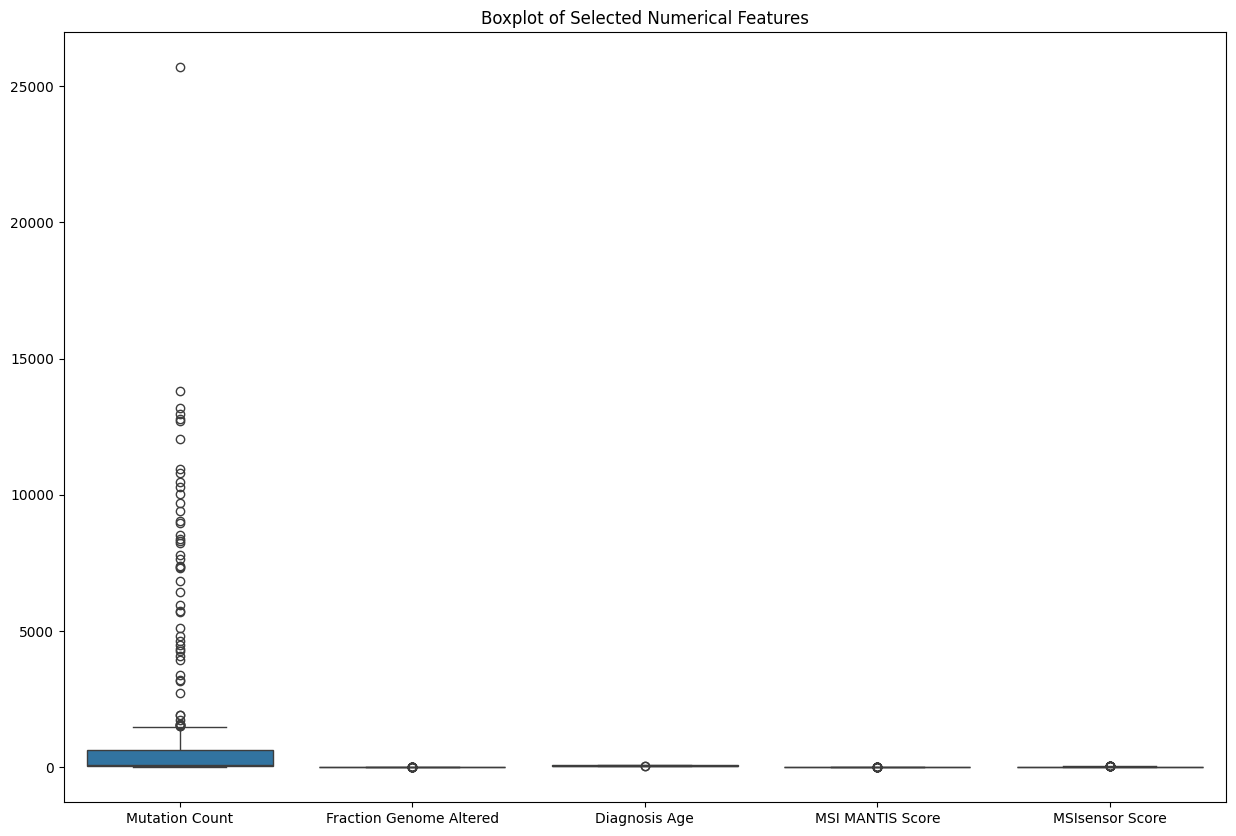

<ipython-input-16-74e3e6cd58e7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Disease-specific Survival status', y='Diagnosis Age', data=df, palette='husl')


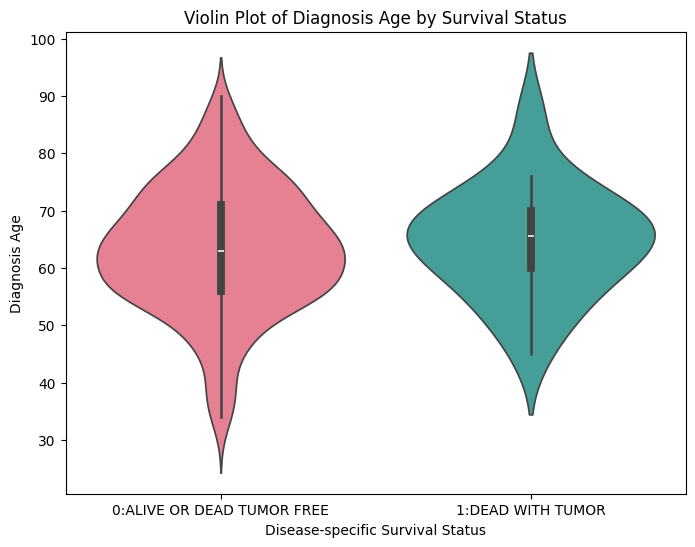

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'Disease-specific Survival status' with a different color palette
plt.figure(figsize=(8, 6))
sns.countplot(x='Disease-specific Survival status', data=df, palette='viridis')  # Change 'viridis' to your desired color palette
plt.title('Class Count in Disease-specific Survival Status')
plt.xlabel('Disease-specific Survival Status')
plt.ylabel('Count')
plt.show()

# Subset of selected features
selected_features = ['Cancer Type Detailed', 'Mutation Count', 'Fraction Genome Altered',
                     'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score', 'Subtype',
                     'Tumor Type', 'Disease-specific Survival status']

selected_df = df[selected_features]

# Boxplot for continuous variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=selected_df[['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score']])
plt.title('Boxplot of Selected Numerical Features')
plt.show()

# Violin plot for 'Diagnosis Age'
plt.figure(figsize=(8, 6))
sns.violinplot(x='Disease-specific Survival status', y='Diagnosis Age', data=df, palette='husl')
plt.title('Violin Plot of Diagnosis Age by Survival Status')
plt.xlabel('Disease-specific Survival Status')
plt.ylabel('Diagnosis Age')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assume selected_df is your original DataFrame
X = selected_df.drop('Disease-specific Survival status', axis=1)
y = selected_df['Disease-specific Survival status']

# Select categorical columns
categorical_columns = ['Cancer Type Detailed', 'Subtype', 'Tumor Type']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42))
])

# Fit and transform the data using the pipeline
X_resampled, y_resampled = pipeline.named_steps['smote'].fit_resample(pipeline.named_steps['preprocessor'].fit_transform(X), y)




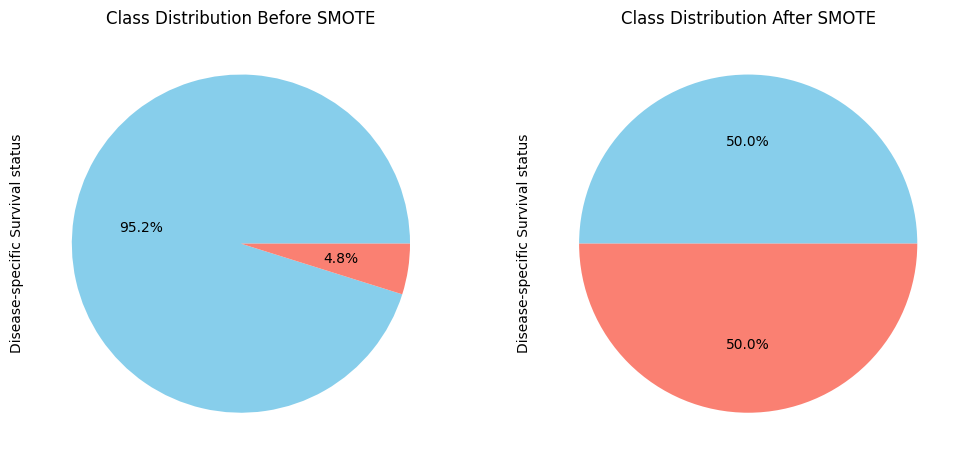

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
y.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=None)
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=None)
plt.title('Class Distribution After SMOTE')


plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Function to create a more complex neural network model
def create_complex_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Function to compile the model
def compile_model(model):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform labels
y_train_encoded = le.fit_transform(y_train)

# Create and compile the more complex model
input_dim = X_train_scaled.shape[1]
complex_model = create_complex_model(input_dim)
compiled_complex_model = compile_model(complex_model)

# Display model summary
compiled_complex_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2176      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)               

In [33]:
def create_different_activation_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

different_activation_model = create_different_activation_model(input_dim)
compiled_different_activation_model = compile_model(different_activation_model)
compiled_different_activation_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               2176      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)               

In [45]:
import numpy as np

# Assuming X_train_scaled and y_train_encoded are already defined

# Fit the model and track training history
history = compiled_complex_model.fit(
    X_train_scaled, np.array(y_train_encoded),
    epochs=50,
    batch_size=16,
    validation_split=0.3,
    verbose=1
)


Epoch 1/50
28/28 [==============================] - 0s 7ms/step - loss: 0.1845 - accuracy: 0.9134 - val_loss: 0.2439 - val_accuracy: 0.9259
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.9385 - val_loss: 0.2436 - val_accuracy: 0.9206
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1750 - accuracy: 0.9271 - val_loss: 0.2468 - val_accuracy: 0.9206
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 0.9294 - val_loss: 0.2477 - val_accuracy: 0.9206
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.9271 - val_loss: 0.2391 - val_accuracy: 0.9365
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1640 - accuracy: 0.9339 - val_loss: 0.2450 - val_accuracy: 0.9312
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9271 - val_loss: 0.2458 - val_accuracy: 0.9259
Epoch 8/50
28/28 [==

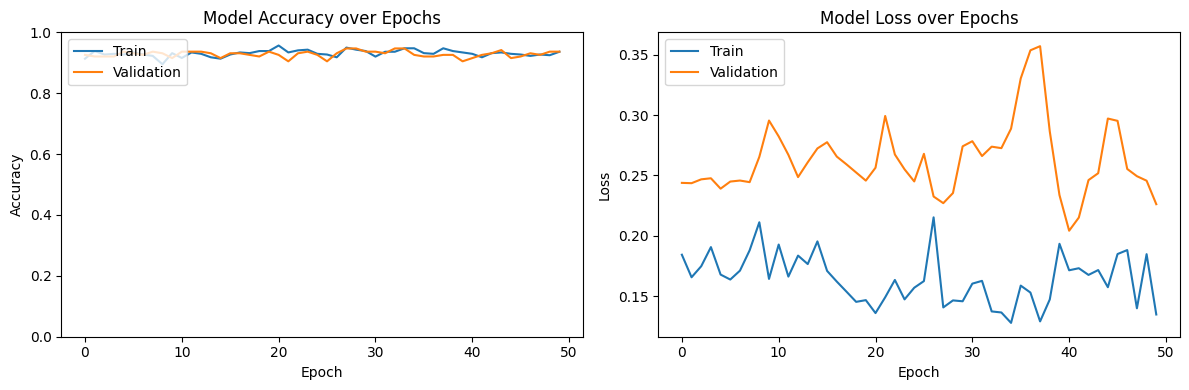

In [46]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (0% to 100%)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [38]:
#FNN
def create_simple_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [84]:
# Assuming X_train_scaled, y_train_encoded, and input_dim are already defined
simple_model_fnn = create_simple_model(input_dim)
compiled_simple_model_fnn = compile_model(simple_model_fnn)

history_simple_fnn = compiled_simple_model_fnn.fit(
    X_train_scaled, np.array(y_train_encoded),
    epochs=150,
    batch_size=16,
    validation_split=0.3,
    verbose=1
)


Epoch 1/150
28/28 [==============================] - 1s 15ms/step - loss: 0.8145 - accuracy: 0.4920 - val_loss: 0.5984 - val_accuracy: 0.7196
Epoch 2/150
28/28 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.6583 - val_loss: 0.5388 - val_accuracy: 0.7619
Epoch 3/150
28/28 [==============================] - 0s 6ms/step - loss: 0.5932 - accuracy: 0.6720 - val_loss: 0.5107 - val_accuracy: 0.7407
Epoch 4/150
28/28 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.7198 - val_loss: 0.5004 - val_accuracy: 0.7460
Epoch 5/150
28/28 [==============================] - 0s 5ms/step - loss: 0.5465 - accuracy: 0.7403 - val_loss: 0.4874 - val_accuracy: 0.7672
Epoch 6/150
28/28 [==============================] - 0s 6ms/step - loss: 0.5438 - accuracy: 0.7449 - val_loss: 0.4807 - val_accuracy: 0.7778
Epoch 7/150
28/28 [==============================] - 0s 6ms/step - loss: 0.5003 - accuracy: 0.7608 - val_loss: 0.4718 - val_accuracy: 0.7778
Epoch 8/150


In [81]:
from tensorflow.keras.layers import LSTM

def create_lstm_model(input_dim, sequence_length):
    model = Sequential()
    model.add(LSTM(64, input_shape=(sequence_length, input_dim), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [90]:
# Assuming X_train_scaled, y_train_encoded, and input_dim are already defined
sequence_length = 6  # Adjust this to your desired sequence length

# Create and compile the LSTM model
lstm_model = create_lstm_model(input_dim, sequence_length)
compiled_lstm_model = compile_model(lstm_model)

# Reshape X_train_scaled for LSTM input
new_shape = (X_train_scaled.shape[0] // sequence_length, sequence_length, input_dim)
X_train_lstm = X_train_scaled[:new_shape[0] * sequence_length, :].reshape(new_shape)

# Train the LSTM model
history_lstm_model = compiled_lstm_model.fit(
    X_train_lstm,
    np.array(y_train_encoded),
    epochs=50,
    batch_size=16,
    validation_split=0.3,
    verbose=1
)


Epoch 1/50
5/5 [==============================] - 2s 84ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.3438
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7043 - accuracy: 0.5278 - val_loss: 0.6859 - val_accuracy: 0.5938
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6768 - accuracy: 0.5972 - val_loss: 0.6809 - val_accuracy: 0.5625
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 0.7002 - accuracy: 0.5556 - val_loss: 0.6778 - val_accuracy: 0.5625
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 0.6702 - accuracy: 0.5833 - val_loss: 0.6770 - val_accuracy: 0.5625
Epoch 6/50
5/5 [==============================] - 0s 16ms/step - loss: 0.6609 - accuracy: 0.5694 - val_loss: 0.6779 - val_accuracy: 0.5625
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6485 - accuracy: 0.5972 - val_loss: 0.6781 - val_accuracy: 0.5625
Epoch 8/50
5/5 [===========

(0.0, 1.0)

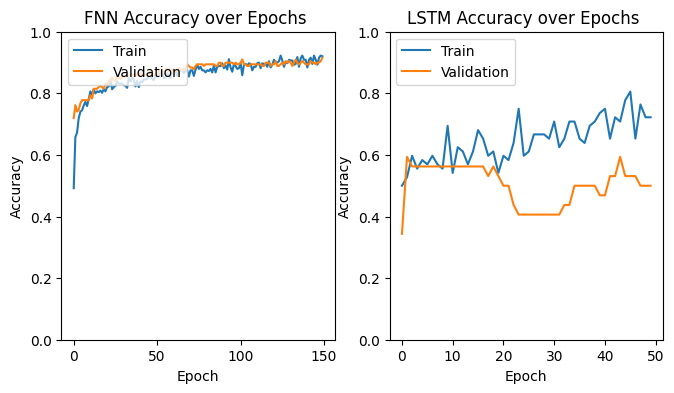

In [92]:
import matplotlib.pyplot as plt

# Assuming history_simple_50_epochs, history_lstm_50_epochs, and history_cnn_50_epochs are defined

# Plotting Accuracy for Simple FNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history_simple_fnn.history['accuracy'], label='Train')
plt.plot(history_simple_fnn.history['val_accuracy'], label='Validation')
plt.title('FNN Accuracy over Epochs ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.ylim(0, 1)

# Plotting Accuracy for LSTM
plt.subplot(1, 3, 2)
plt.plot(history_lstm_model.history['accuracy'], label='Train')
plt.plot(history_lstm_model.history['val_accuracy'], label='Validation')
plt.title('LSTM Accuracy over Epochs ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.ylim(0, 1)

